### Docs

1. [facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)  
2. [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
3. [Faceting with seaborn](https://www.kaggle.com/residentmario/faceting-with-seaborn)
4. [visualizing-data-with-pair-plots-in-python](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(10,8)})

In [2]:
df = pd.read_csv("pseudo_facebook.tsv", sep = '\t')
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [5]:
df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [6]:
df['dob_month'].unique()

array([11, 12,  1,  2,  3,  4,  5,  8,  9,  6,  7, 10], dtype=int64)

## Faceting

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.

![](facet.PNG)

### The FacetGrid

[sns.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)


The core seaborn utility for faceting is the FacetGrid. A FacetGrid is an object which stores some information on how you want to break up your data visualization.

Suppose that we're interested in comparing the dob of months __[1,12]__. To do this, we can create a FacetGrid with our data, telling it that we want to break the __dob_month__ variable down by col (column).



In [7]:
ak = df[df['dob_month'].isin([1,12])]
ak.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0


Since we're zeroing in on just two positions in particular, this results in a pair of grids ready for us to "do" something with them.

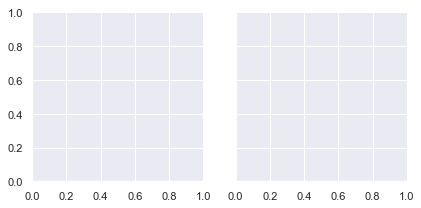

In [8]:
g = sns.FacetGrid(ak, col = 'gender')

From there, we use the `map` object method to plot the data into the laid-out grid.

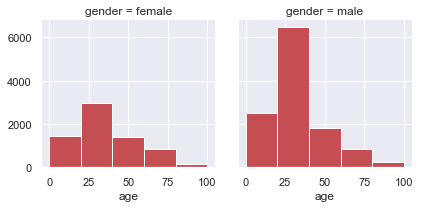

In [9]:
# put FacetGrid and map in same cell otherwise error

bins = np.arange(0, 120, 20)
g = sns.FacetGrid(ak, col = 'gender')
g = g.map(plt.hist, "age", bins=bins, color="r")

Passing a method into another method like this may take some getting used to, if this is your first time seeing this being done. But once you get used to it, FacetGrid is very easy to use.

By using an object to gather "design criteria", seaborn does an effective job seamlessly marrying the data representation to the data values, sparing us the need to lay the plot out ourselves.

***

If we want to see the distribution of days of birth for different months. But if we squeezed all of the months into one row, the resulting plots would be tiny. FacetGrid comes equipped with a __col_wrap__ parameter for dealing with this case exactly.

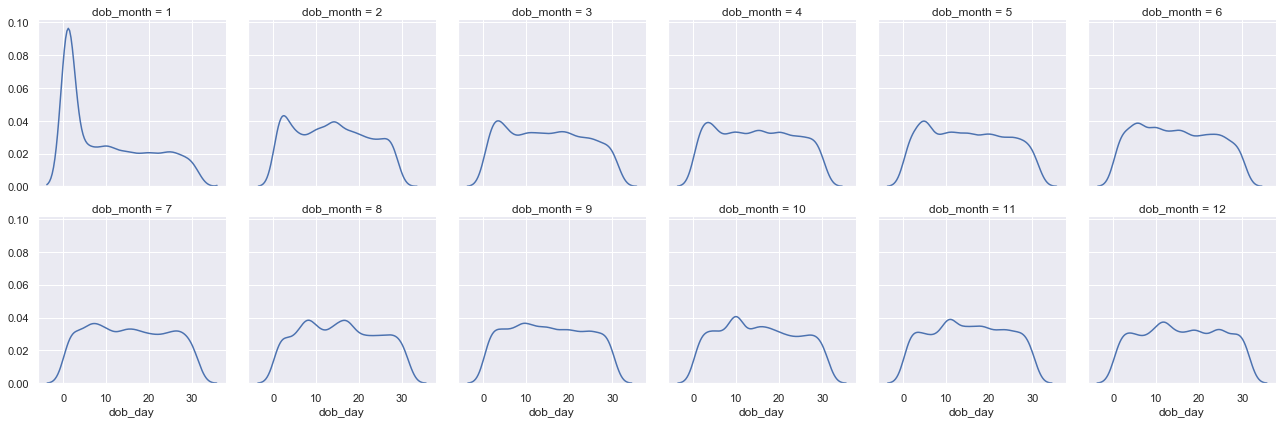

In [10]:
del(g)
g = sns.FacetGrid(df, col = 'dob_month', col_wrap = 6)
g = g.map(sns.kdeplot, "dob_day")

***
***

So far we've been dealing exclusively with one col (column) of data. The "grid" in FacetGrid, however, refers to the ability to lay data out by row and column.

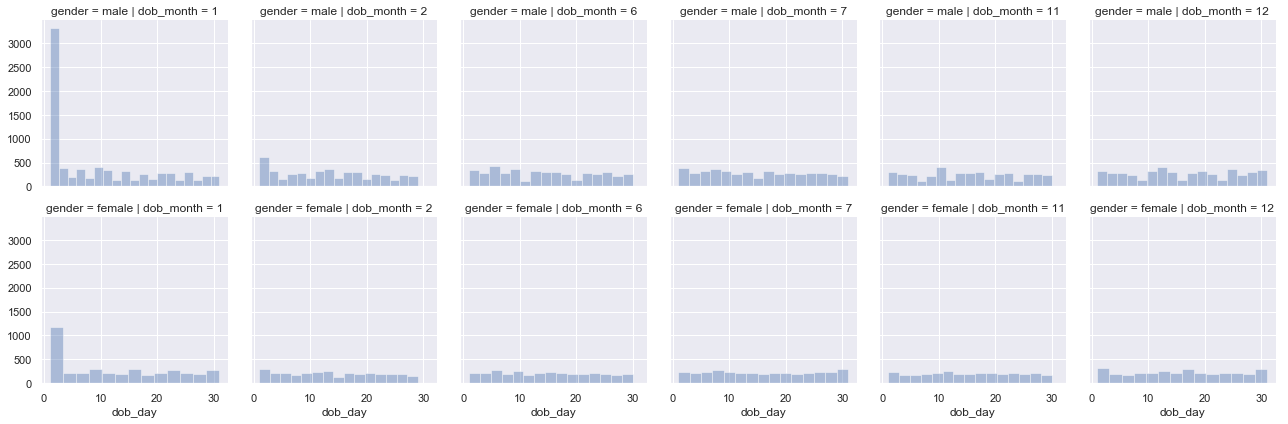

In [11]:
del(g)
g = sns.FacetGrid(df.loc[df.dob_month.isin([1,2,6,7,11,12]),:], col = 'dob_month', row = 'gender')
g = g.map(sns.distplot, "dob_day", kde = False)

FacetGrid orders the subplots effectively arbitrarily by default. To specify your own ordering explicitly, pass the appropriate argument to the row_order and col_order parameters.

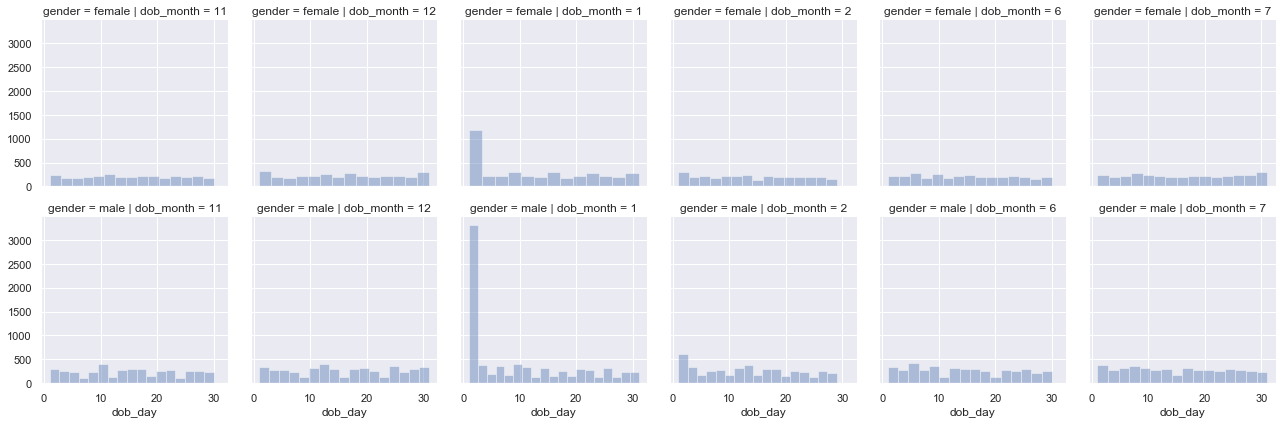

In [12]:
del(g)
g = sns.FacetGrid(df.loc[df.dob_month.isin([1,2,6,7,11,12]),:], col = 'dob_month', row = 'gender',
                 row_order = ['female', 'male'], col_order = [11,12,1,2,6,7])
g = g.map(sns.distplot, "dob_day", kde = False)

#### Why facet?
In a nutshell, faceting is the easiest way to make your data visualization multivariate.

Faceting is multivariate because after laying out one (categorical) variable in the rows and another (categorical) variable in the columns, we are already at two variables accounted for before regular plotting has even begun.

And faceting is easy because transitioning from plotting a kdeplot to gridding them out, as here, is very simple. It doesn't require learning any new visualization techniques. The limitations are the same ones that held for the plots you use inside.

Faceting does have some important limitations however. It can only be used to break data out across singular or paired categorical variables with very low numeracy—any more than five or so dimensions in the grid, and the plots become too small (or involve a lot of scrolling). Additionally it involves choosing (or letting Python) an order to plot in, but with nominal categorical variables that choice is distractingly arbitrary.

Nevertheless, faceting is an extremely useful and applicable tool to have in your toolbox.

## Pairplot

pairplot is a very useful and widely used __seaborn method for faceting variables (as opposed to variable values)__. You pass it a pandas DataFrame in the right shape, and it returns you a gridded result of your variable values.

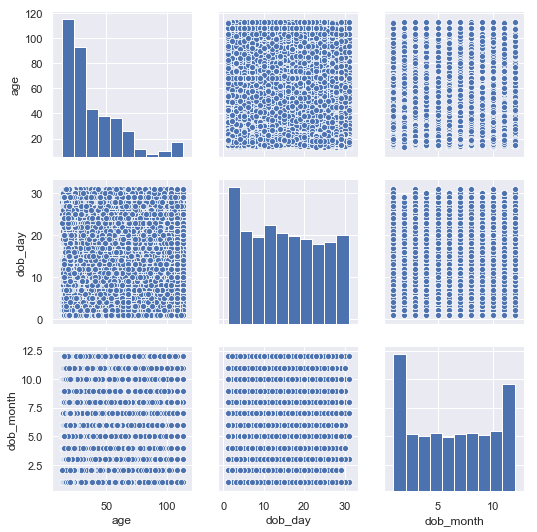

In [13]:
sns.pairplot(df.loc[:,['age', 'dob_day', 'dob_month']]);

By default pairplot will return scatter plots in the main entries and a histogram in the diagonal. pairplot is oftentimes the first thing that a data scientist will throw at their data, and it works fantastically well in that capacity, even if sometimes the scatter-and-histogram approach isn't quite appropriate, given the data types.

[seaborn doc](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

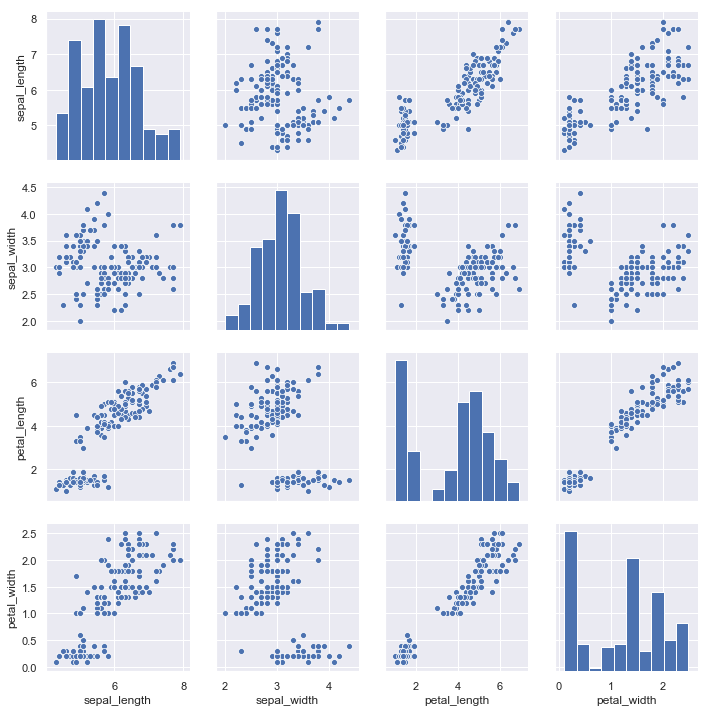

In [14]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Show different levels of a categorical variable by the color of plot elements

In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


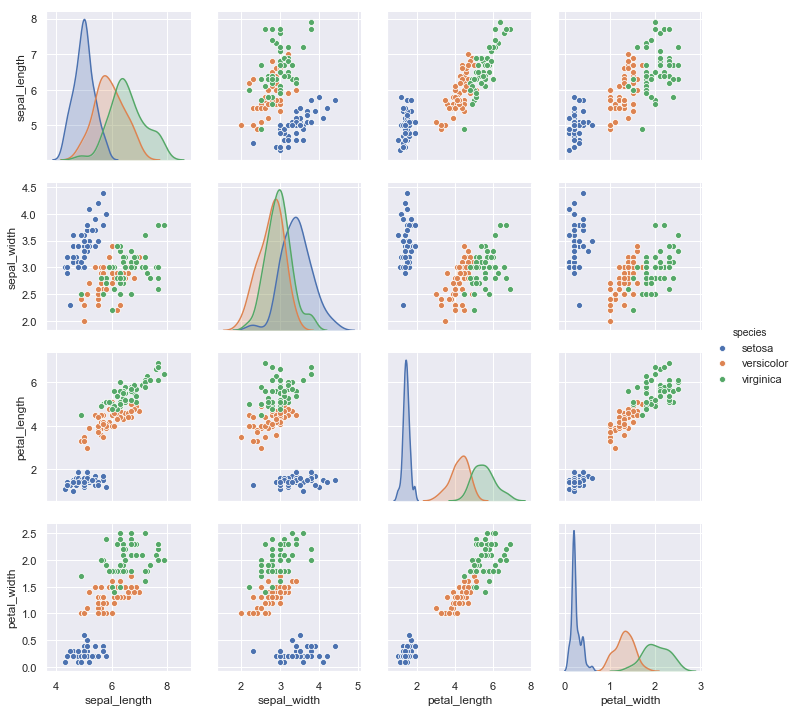

In [16]:
g = sns.pairplot(iris, hue="species")

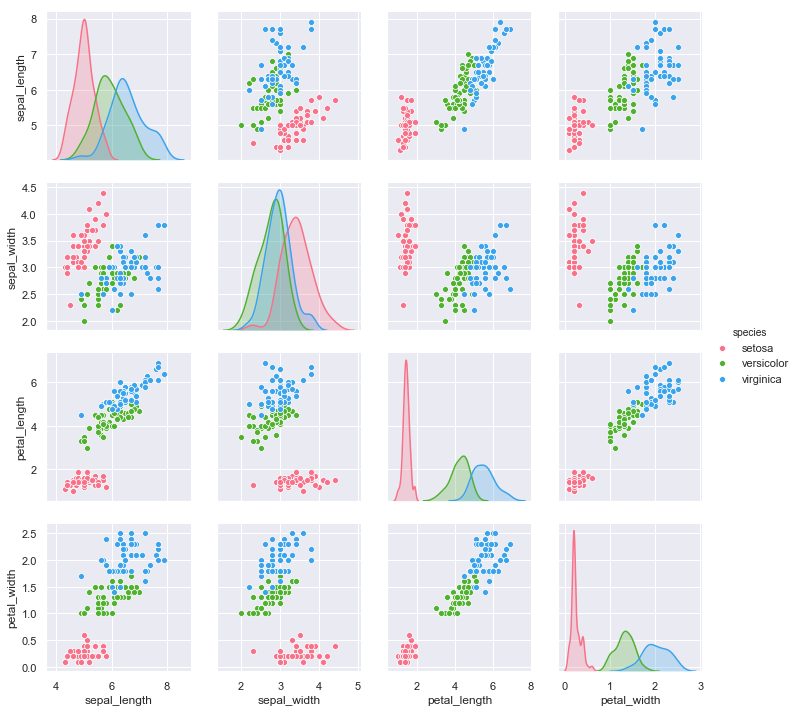

In [17]:
g = sns.pairplot(iris, hue="species", palette="husl");

Use different markers for each level of the hue variable:

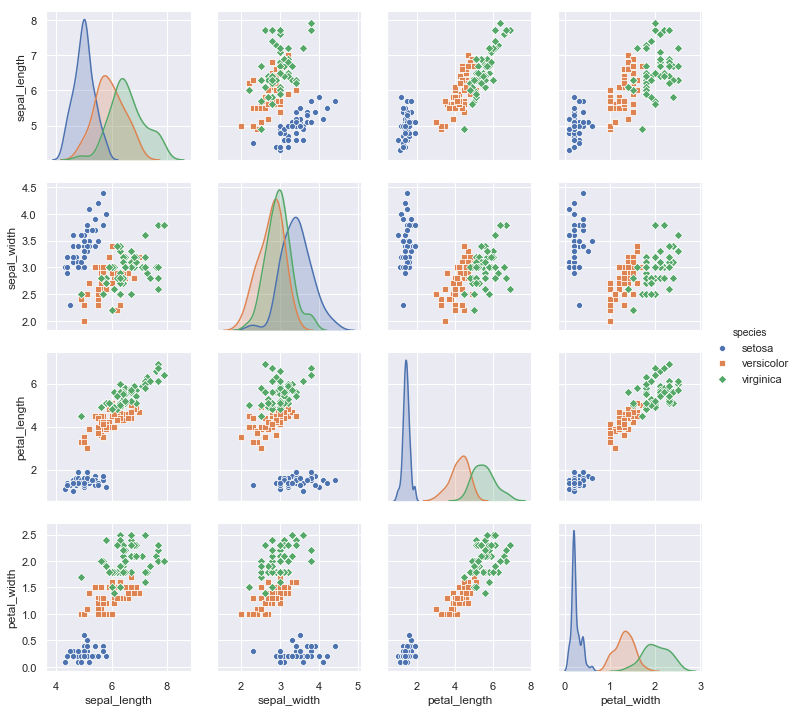

In [18]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"]);

Plot a subset of variables:

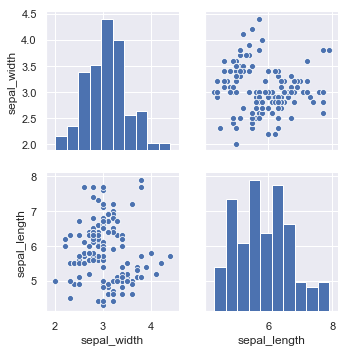

In [19]:
g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"]);

Draw larger plots:

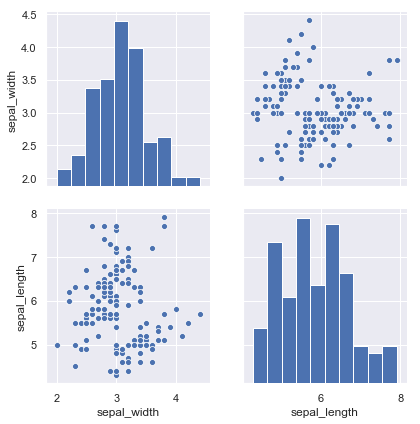

In [20]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"], height = 3);

Plot different variables in the rows and columns:

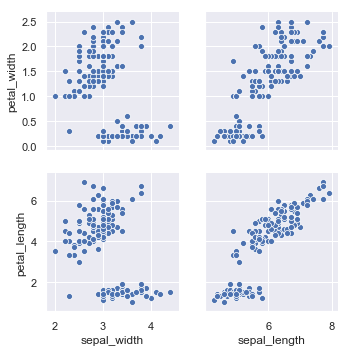

In [21]:
sns.pairplot(iris, x_vars=["sepal_width", "sepal_length"], 
            y_vars = ["petal_width", "petal_length"]);

Use kernel density estimates for univariate plots:

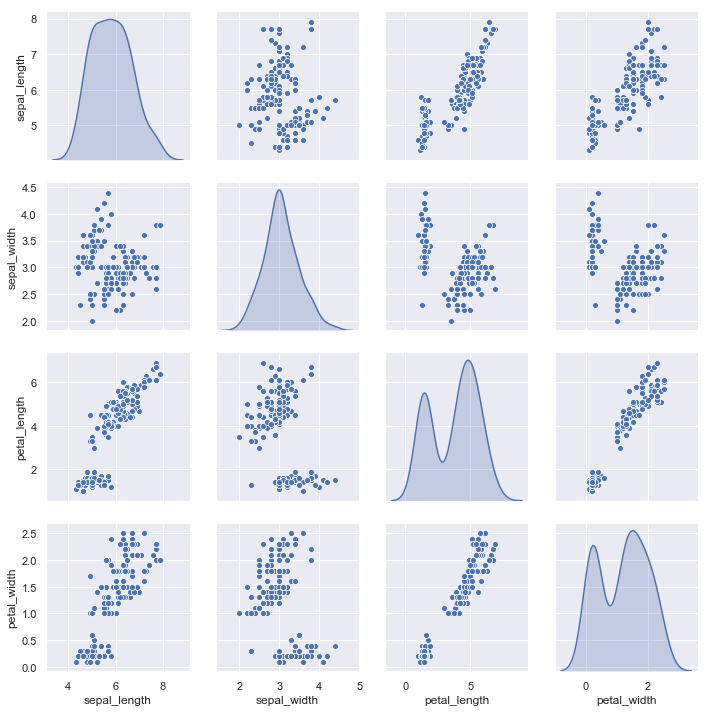

In [22]:
g = sns.pairplot(iris, diag_kind="kde");

Fit linear regression models to the scatter plots:

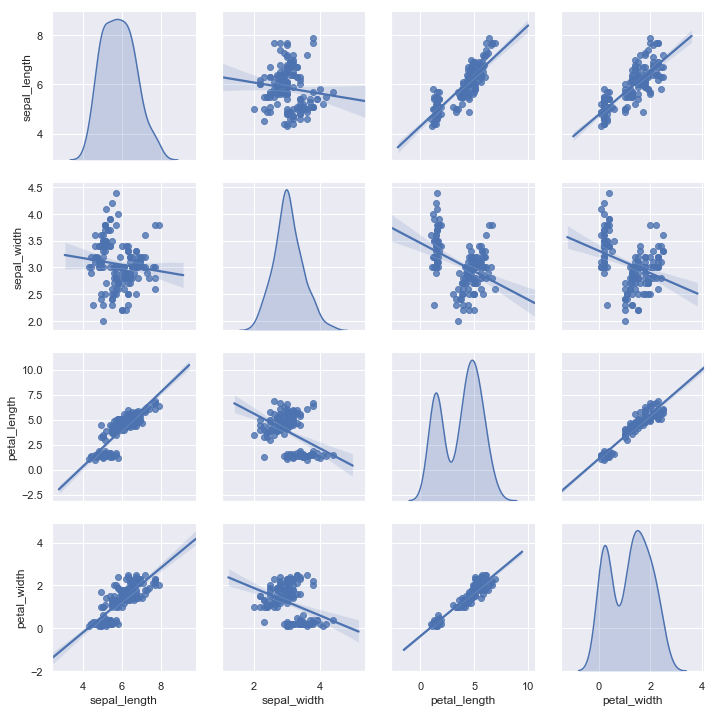

In [23]:
g = sns.pairplot(iris, diag_kind="kde", kind = 'reg');

Pass keyword arguments down to the underlying functions (it may be easier to use PairGrid directly):

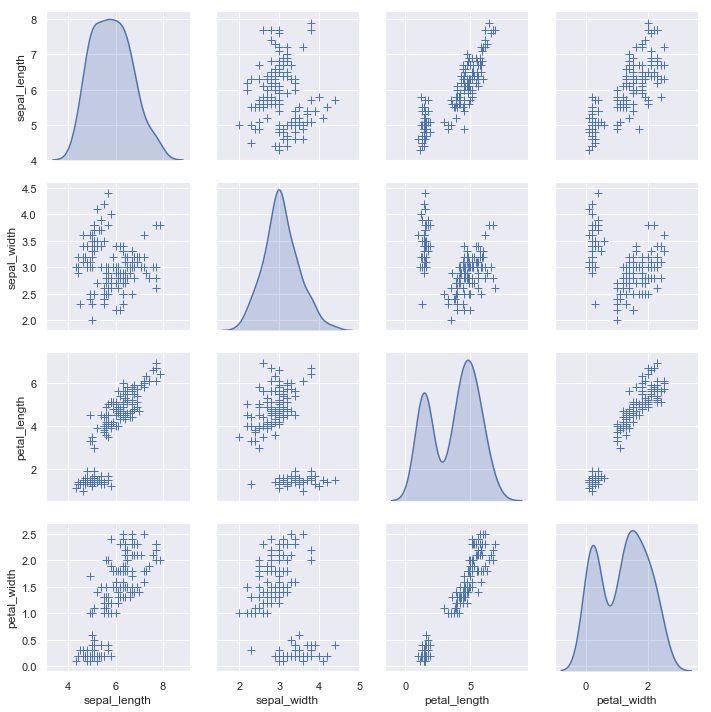

In [24]:
g = sns.pairplot(iris, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True));